In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline

In [101]:
df = pd.read_csv("MLDataset.csv",header = None)

In [102]:
df.shape

(539, 292)

In [103]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 291].values

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [105]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [106]:
y_train = y_train.reshape((431,1))

In [107]:
def SolveRidgeRegression(X, y):
    wRR_list = []
    df_list = []
    for i in range(0, 5001, 1):
        lam_par = i
        xtranspose = np.transpose(X)
        xtransx = np.dot(xtranspose, X)
        if xtransx.shape[0] != xtransx.shape[1]:
            raise ValueError('Needs to be a square matrix for inverse')
        lamidentity = np.identity(xtransx.shape[0]) * lam_par
        matinv = np.linalg.inv(lamidentity + xtransx)
        xtransy = np.dot(xtranspose, y)
        wRR = np.dot(matinv, xtransy)
        _, S, _ = np.linalg.svd(X)
        df = np.sum(np.square(S) / (np.square(S) + lam_par))
        wRR_list.append(wRR)
        df_list.append(df)
        #print(i)
    return wRR_list, df_list

In [108]:
wRR_list, df_list = SolveRidgeRegression(x_train, y_train)
wRRArray = np.asarray(wRR_list)
dfArray = np.asarray(df_list)

In [109]:
def getRMSEValues(X_test, y_test, wRRArray, max_lamda, poly):
    RMSE_list = []
    for lamda in range(0, max_lamda+1):
        wRRvals = wRRArray[lamda]
        y_pred = np.dot(X_test, wRRvals)
        RMSE = np.sqrt(np.sum(np.square(y_test - y_pred))/len(y_test))
        RMSE_list.append(RMSE)
    plotRMSEValue(max_lamda, RMSE_list, poly=poly)

In [110]:
def plotRMSEValue(max_lamda, RMSE_list, poly):
    colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628']
    legend = ["Polynomial Order, p = 1", "Polynomial Order, p = 2", "Polynomial Order, p = 3"]
    plt.plot(range(len(RMSE_list)), RMSE_list, color = colors[poly])
    plt.scatter(range(len(RMSE_list)), RMSE_list, color = colors[poly] , s = 8, label= legend[poly-1])
    # df(lambda)
    plt.xlabel(r"$\lambda$")
    plt.ylabel("RMSE")
    # and a legend
    plt.legend(loc='upper left')
    plt.title(r"RMSE vs $\lambda$ values for the test set, $\lambda$ = 0..%d"%(max_lamda))

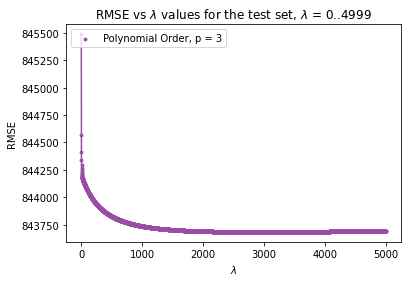

In [111]:
plt.figure()
getRMSEValues(x_test, y_test, wRRArray, max_lamda=4999, poly=3)
plt.show()

In [112]:
wRRvals = wRRArray[4999]
y_pred = np.dot(x_test, wRRvals)

In [113]:
metrics.r2_score(y_test, y_pred)

-7465.828311729302

In [114]:
df_repre = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

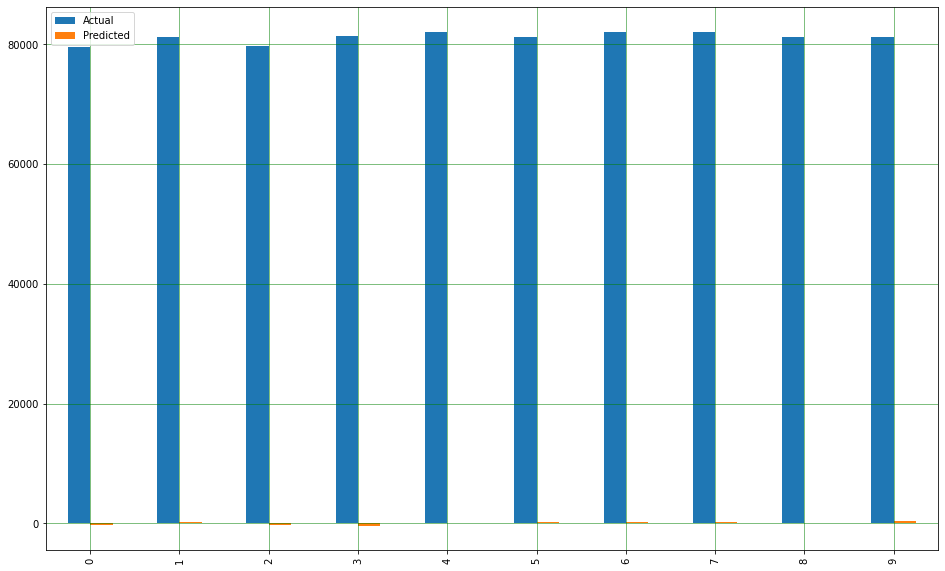

In [115]:
df1 = df_repre.head(10)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()